In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/alber/Downloads/cardio_norm.csv')
data

,Comune,2013,2014,2015,2016,2017,2018,2019
0,Abbiategrasso,0.249183,0.252213,0.255023,0.258280,0.262748,0.263703,0.265882
1,Albairate,0.225683,0.228990,0.235056,0.245165,0.254755,0.259236,0.261018
2,Arconate,0.215473,0.224375,0.227197,0.232071,0.237612,0.242616,0.245237
3,Arese,0.258871,0.264911,0.265033,0.272131,0.273314,0.286552,0.285565
4,Arluno,0.246869,0.252498,0.254242,0.253808,0.255168,0.255250,0.255995
...,...,...,...,...,...,...,...,...
135,"Fiera, Gallaratese, Quarto Oggiaro",0.247075,0.248578,0.247891,0.246244,0.244652,0.240692,0.237497
136,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",0.205165,0.208287,0.208491,0.206489,0.206161,0.203571,0.203840
137,"Stazione Garibaldi, Niguarda",0.224516,0.226168,0.224812,0.224147,0.224826,0.223813,0.223154
138,"Vigentino, Chiaravalle, Gratosoglio",0.231720,0.236113,0.235072,0.236847,0.237545,0.234260,0.233940


In [2]:
dict_municipi = {"Centro" : "Centro Storico", "Barona, Lorenteggio" : "Barona Lorenteggio", "Baggio, De Angeli, San Siro": "San Siro Baggio Trenno",
                "Stazione Garibaldi, Niguarda": "Stazione Garibaldi Niguarda", "Città Studi, Lambrate, Venezia": "Città Studi Lambrate",
                "Vittoria, Forlanini": "Vittoria Forlanini", "Stazione Centrale, Gorla, Turro, Greco, Crescenzago": "Stazione Centrale Bicocca",
                "Vigentino, Chiaravalle, Gratosoglio": "Vigentino Chiaravalle Gratosoglio", "Fiera, Gallaratese, Quarto Oggiaro": "Fiera Gallaratese Quarto Oggiaro"}
data = data.replace({"Comune": dict_municipi})
data

,Comune,2013,2014,2015,2016,2017,2018,2019
0,Abbiategrasso,0.249183,0.252213,0.255023,0.258280,0.262748,0.263703,0.265882
1,Albairate,0.225683,0.228990,0.235056,0.245165,0.254755,0.259236,0.261018
2,Arconate,0.215473,0.224375,0.227197,0.232071,0.237612,0.242616,0.245237
3,Arese,0.258871,0.264911,0.265033,0.272131,0.273314,0.286552,0.285565
4,Arluno,0.246869,0.252498,0.254242,0.253808,0.255168,0.255250,0.255995
...,...,...,...,...,...,...,...,...
135,Fiera Gallaratese Quarto Oggiaro,0.247075,0.248578,0.247891,0.246244,0.244652,0.240692,0.237497
136,Stazione Centrale Bicocca,0.205165,0.208287,0.208491,0.206489,0.206161,0.203571,0.203840
137,Stazione Garibaldi Niguarda,0.224516,0.226168,0.224812,0.224147,0.224826,0.223813,0.223154
138,Vigentino Chiaravalle Gratosoglio,0.231720,0.236113,0.235072,0.236847,0.237545,0.234260,0.233940


In [3]:
data = data.drop(['2017', '2018', '2019'], axis=1)
data.shape

(140, 5)

In [4]:
new_data = pd.DataFrame(columns=['Comune','Cardio_incidence','Year'])

for i in range(len(data.columns)-1):
    temp = data[['Comune', data.columns[i+1]]]
    year = temp.columns[-1]
    temp = temp.rename(columns={temp.columns[-1]: 'Cardio_incidence'})
    temp['Year'] = year
    new_data = pd.concat([new_data, temp], ignore_index=True)
    
new_data['Year'] = new_data['Year'].astype('int64')
new_data

,Comune,Cardio_incidence,Year
0,Abbiategrasso,0.249183,2013
1,Albairate,0.225683,2013
2,Arconate,0.215473,2013
3,Arese,0.258871,2013
4,Arluno,0.246869,2013
...,...,...,...
555,Fiera Gallaratese Quarto Oggiaro,0.246244,2016
556,Stazione Centrale Bicocca,0.206489,2016
557,Stazione Garibaldi Niguarda,0.224147,2016
558,Vigentino Chiaravalle Gratosoglio,0.236847,2016


In [5]:
# OFFICIAL
import numpy as np
outcome = []
multiplicator = []
med = new_data['Cardio_incidence'].median()

for i in range(len(new_data)):
    multiplicator.append(abs(np.round(new_data['Cardio_incidence'][i] - med, 2))*100)
    if new_data['Cardio_incidence'][i] >= med:
        outcome.append(1)
    else:
        outcome.append(0)
    
new_data['Multiplicator'] = multiplicator
new_data['Label'] = outcome

In [6]:
# import numpy as np
# outcome = []
# multiplicator = []
# med_2013 = new_data[new_data['Year'] == 2013]['Cardio_incidence'].median()
# med_2014 = new_data[new_data['Year'] == 2014]['Cardio_incidence'].median()
# med_2015 = new_data[new_data['Year'] == 2015]['Cardio_incidence'].median()
# med_2016 = new_data[new_data['Year'] == 2016]['Cardio_incidence'].median()

# for i in range(len(new_data)):
#     if new_data['Year'][i] == 2013:
#         multiplicator.append(abs(np.round(new_data['Cardio_incidence'][i] - med_2013, 2))*100)
#         if new_data['Cardio_incidence'][i] >= med_2013:
#             outcome.append(1)
#         else:
#             outcome.append(0)
#     elif new_data['Year'][i] == 2014:
#         multiplicator.append(abs(np.round(new_data['Cardio_incidence'][i] - med_2014, 2))*100)
#         if new_data['Cardio_incidence'][i] >= med_2014:
#             outcome.append(1)
#         else:
#             outcome.append(0)
#     elif new_data['Year'][i] == 2015:
#         multiplicator.append(abs(np.round(new_data['Cardio_incidence'][i] - med_2015, 2))*100)
#         if new_data['Cardio_incidence'][i] >= med_2015:
#             outcome.append(1)
#         else:
#             outcome.append(0)
#     else:
#         multiplicator.append(abs(np.round(new_data['Cardio_incidence'][i] - med_2016, 2))*100)
#         if new_data['Cardio_incidence'][i] >= med_2016:
#             outcome.append(1)
#         else:
#             outcome.append(0)
    
# new_data['Multiplicator'] = multiplicator
# new_data['Label'] = outcome

In [7]:
new_data

,Comune,Cardio_incidence,Year,Multiplicator,Label
0,Abbiategrasso,0.249183,2013,1.0,1
1,Albairate,0.225683,2013,1.0,0
2,Arconate,0.215473,2013,2.0,0
3,Arese,0.258871,2013,2.0,1
4,Arluno,0.246869,2013,1.0,1
...,...,...,...,...,...
555,Fiera Gallaratese Quarto Oggiaro,0.246244,2016,1.0,1
556,Stazione Centrale Bicocca,0.206489,2016,3.0,0
557,Stazione Garibaldi Niguarda,0.224147,2016,2.0,0
558,Vigentino Chiaravalle Gratosoglio,0.236847,2016,0.0,0


In [8]:
new_data['Multiplicator'].value_counts()

1.0     176
2.0     104
0.0     100
3.0      84
4.0      57
5.0      18
6.0      13
8.0       5
7.0       2
10.0      1
Name: Multiplicator, dtype: int64

In [9]:
new_data.to_csv('Health_data_preprocessed/cardio_preprocessed.csv', index=False)

<AxesSubplot:xlabel='Year', ylabel='count'>

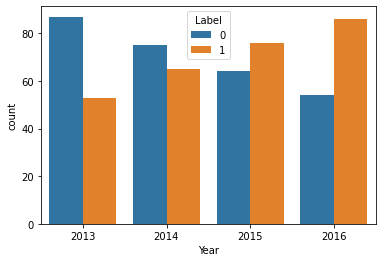

In [10]:
import seaborn as sns
sns.countplot(x='Year', hue='Label', data=new_data)